In [1]:
import numpy as np
import scipy
import scipy.signal
import thinkdsp
import thinkplot
import urllib.request



%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

No handles with labels found to put in legend.


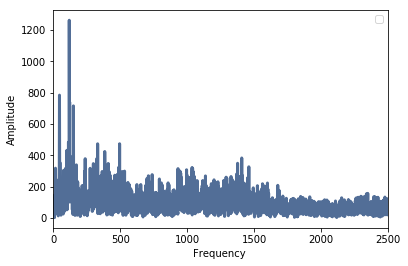

In [2]:
truck_audio = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/1secChunks/truck/Truck-1.wav'

truck_wav = thinkdsp.read_wave(truck_audio)

truck_wav.make_spectrum().plot()

thinkplot.config(xlabel='Frequency ',
                     ylabel='Amplitude',xlim=[0,2500] )


In [3]:
import matplotlib.pyplot as plt
from scipy.io import wavfile # get the api
from scipy.fftpack import fft
from pylab import *

def f(filename):
    fs, data = wavfile.read(filename)# load the data
    a = data                         # this is a two channel soundtrack, I get the first track
#     b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
    c = fft(data)                       # create a list of complex number
    d = len(c)/2                     # you only need half of the fft list
    print ('d',d)
    absfft = abs(c[:int(d-1)])
#     plt.plot(absfft,'r')
#     plt.plot(absfft,'r')
#     plt.xlim((0,1000))
#     plt.show()

In [4]:
import glob
truck_aud_file = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/1secChunks/truck/Truck-1.wav'
f(truck_aud_file)
# for wf in glob.glob(truck_dir+'*.wav'):
# #     print wf
#     f(wf)

d 22050.0


In [5]:
import logging
import math
import numpy as np
import os
import pydub  
import scipy
import scipy.signal as signal
import sys
# import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Audio

import thinkdsp
import thinkplot

In [6]:
filename = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/1secChunks/truck/Truck-1.wav'

truck_wav = thinkdsp.read_wave(filename)
truck_wav.make_audio()
framerate = truck_wav.framerate

print ('Framefrate: ', framerate)

Framefrate:  44100


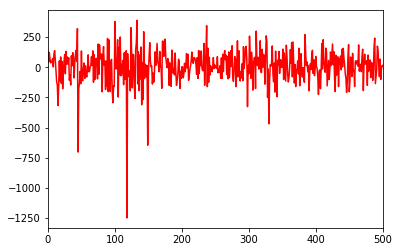

In [7]:
# fs, data = wavfile.read(filename)

N = len(truck_wav.ys)
d = 1./framerate

hs = np.fft.rfft(truck_wav.ys)
fs = np.fft.rfftfreq(N,d)
       

# low_hs = np.fft.rfft(low.ys)
_ = plt.plot(fs, hs.real, color='red' )
# _ = plt.plot(fs, low_hs.real, color='red', alpha=0.5, )
_ = plt.xlim([0, 500])
plt.show()

In [8]:
import matplotlib.pyplot as plt
from scipy.io import wavfile # get the api
from scipy.fftpack import fft
from pylab import *

def ffftplot(filename):
    fs, data = wavfile.read(filename) # load the data
#     print 'data shape: ', data.shape
    a = data.T[0] # this is a two channel soundtrack, I get the first track
#     b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
    c = fft(a) # create a list of complex number
    print ('fftshape: ', c.shape)
    print ('fftlen: ', len(c))
    d = len(c)/2  # you only need half of the fft list
    plt.plot(abs(c[:(d-1)]),'r')
#     plt.plot(abs(c),'r')
#     plt.xlim((0,2000))
    plt.show()
    
    c_abs = np.absolute(c[:int(d-1)])
    print ('absolute c: ', c_abs)
    mcr = np.mean(c_abs)
    print ('MEAN: ', mcr  )
    print ('MAX : ', np.max(c_abs))
#     collection = [x for x in c_abs if x >= ((12.75*mcr)) ]
    collection={}
    for i in range(len(c_abs)):
        if(c_abs[i] >= ((12.75*mcr))):
            collection[i] = c_abs[i]
#     print 'short listed: ',collection
    print ('short listed len: ',len(collection), '  len original: ', len(c_abs))
#     print 'Key Value pairs:',collection
    hl = len(collection.values())/2
    plt.plot(collection.values()[:hl-1],'g')
#     plt.xlim((0,2000))   
    plt.show()

In [20]:
def find_prominent_freqeuencies(filename):
    print ('in function filename: ', filename)
#     collection = {}
#     truck_wav = thinkdsp.read_wave(filename)
#     truck_wav.make_audio()

    fs, data = wavfile.read(filename) # load the data
    print ('monon/stereo : ', data.shape)
    if len(data.shape) > 1:
        a = data.T[0] # this is a two channel soundtrack, I get the first track
    else:
        a = data
    c = fft(a) # create a list of complex number
#     print 'fftshape: ', c.shape
#     print 'fftlen: ', len(c)
    d = len(c)/2  # you only need half of the fft list
#     plt.plot(abs(c[:int(d-1)]),'r')
#     plt.xlim((0,1000))
#     plt.show()
    c_abf_fil = np.absolute(c[:int(d-1)])
    c_abs = c_abf_fil[:800]
    
    for i in range(200):
        c_abs [i] = 0 
    
#     print 'absolute c: ', c_abs
    mcr = np.sum(c_abs)
    mcr = mcr/len(c_abs)
    print ('MEAN: ', mcr )
    print ('MAX : ', np.max(c_abs))
#     collection = [x for x in c_abs if x >= ((12.75*mcr)) ]
    collection={}
    for i in range(len(c_abs)):
        if c_abs[i] >= (mcr):
            collection[i] = c_abs[i]
        else:
            collection[i] = 0
#     print 'short listed: ',collection
    print ('short listed len: ',len(collection), '  len original: ', len(c_abs))
#     print 'Key Value pairs:',collection
#     hl = len(collection.values())/2
#     plt.plot(collection.values()[:hl-1],'g')
#     plt.plot(collection.values(), 'g')
#     plt.xlim((0,1000))   
#     plt.show()
    return collection

In [21]:
import glob

list_collection = []
dir_path = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/trucks/'
for wavf in glob.glob(dir_path+'*.wav'):
#     print 'filename ', wavf
    coll = find_prominent_freqeuencies(wavf)
    list_collection.append(coll)
    

in function filename:  /Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/trucks/3AYBZ2623dk.wav
monon/stereo :  (441000,)
MEAN:  9394180.613095213
MAX :  121281822.86288452
short listed len:  800   len original:  800
in function filename:  /Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/trucks/5perV0v6lkk.wav
monon/stereo :  (441000, 2)
MEAN:  2589974.5223054346
MAX :  186592437.77658913
short listed len:  800   len original:  800
in function filename:  /Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/trucks/0XnlJAdG5e8.wav
monon/stereo :  (441000, 2)
MEAN:  13205493.499749986
MAX :  301404105.8968313
short listed len:  800   len original:  800
in function filename:  /Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/trucks/5ftfKerE6s0.wav
monon/stereo :  (480000, 2)
MEAN:  1188920.2645402765
MAX :  34735627.27521592
short listed len:

In [22]:
def check_range(val):
    for i in range(200, 791,10):
        if val >= i and val <(i+10):
            return i
            
# print check_range(199)
# print check_range(799)
# print check_range(800)
# print check_range(801)

In [23]:
coll2 = {}
for i,coll in enumerate(list_collection):
#     print coll
#     print i, 'th colletion: '
#     print coll.keys()
    for k in coll.keys():
        if  k >=200 and coll[k] > 1.0:
            ke = check_range(k)
            if ke in coll2:
                coll2[ke] = (coll2[ke][0]+1,coll2[ke][1]+coll[k])
            else:
#                 coll2[ke] = (0, 0)
                coll2[ke] = (1, coll[k])
                
for k in coll2.keys():
    coll2[k] = (coll2[k][0]/100.0 , coll2[k][1]/(coll2[k][0]*10))
                
print ('KEYS: ', len(coll2.keys()))
p1 = 1
for key in sorted(coll2):
    print ('key: ', key , ' val: ', coll2[key])
#     print (key,',')
    p1 = p1*coll2[k][0]

KEYS:  60
key:  200  val:  (0.09, 585908.3381042585)
key:  210  val:  (0.09, 682308.4184197888)
key:  220  val:  (0.22, 700136.3327974635)
key:  230  val:  (0.2, 687388.6277375543)
key:  240  val:  (0.16, 1038848.6522918895)
key:  250  val:  (0.18, 883653.6730800827)
key:  260  val:  (0.18, 824376.0395685313)
key:  270  val:  (0.24, 917518.0592266261)
key:  280  val:  (0.18, 860021.5245126596)
key:  290  val:  (0.12, 866883.7857121554)
key:  300  val:  (0.18, 920559.759274735)
key:  310  val:  (0.19, 1082429.3389847844)
key:  320  val:  (0.27, 2045559.595687878)
key:  330  val:  (0.43, 2251829.4526186716)
key:  340  val:  (0.4, 5534871.752371538)
key:  350  val:  (0.38, 4131152.886582898)
key:  360  val:  (0.4, 1989821.7954332074)
key:  370  val:  (0.31, 1975134.286543383)
key:  380  val:  (0.27, 1302074.9290552102)
key:  390  val:  (0.46, 1199548.5110372433)
key:  400  val:  (0.4, 2485085.9655593117)
key:  410  val:  (0.42, 2065740.2182184793)
key:  420  val:  (0.46, 1738363.715586172

In [28]:
def print_Probability(myFile):
    truck_d = find_prominent_freqeuencies(myFile)
    td = {}
    for k in truck_d.keys():
            if  k >=200 and truck_d[k] > 1.0:
                ke = check_range(k)
                if ke in td:
                    td[ke] = (td[ke][0]+1,td[ke][1]+truck_d[k])
                else:
                    td[ke] = (1, truck_d[k])

    for k in td.keys():
        td[k] = (td[k][0]/10.0 , td[k][1]/td[k][0])
#         print ('td[k]',td[k])
#     for key in sorted(td.keys()):
#         print ('key: ', key , ' val: ', td[key])
    p2 = 1.0
    modified_p = 1.0
    for k in td.keys():
    #     print ('Key: ',k , '  values:', td[k])
        if k>=200:
            if(td[k][1] >= coll2[k][1]):
                p2 = p2*td[k][0]
                modified_p = modified_p*coll2[k][0]
#             else:
#                 p2 = p2*0.001
#                 modified_p = modified_p*coll2[k][0]
    print ('p2',p2,'modified_p',modified_p)
    prob_truck = 0.5
    Output_prob = (0.5*modified_p)/p2
    print ('Truck Probability : ',Output_prob)

In [27]:
# new_truck_audio = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/noisy-data-set/truck/Truck-1-01-.wav'
new_truck_audio = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/noisy-data-set/truck/Truck-1-02-.wav'
new_nontruck_audio = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/noisy-data-set/non_truck/Non-Truck-10-02-.wav'

# for myFile in glob.glob(new_truck_audio+"*.wav"):
print_Probability(new_truck_audio)
print ('----------------------------------')
print_Probability(new_nontruck_audio)


# #######

# truck_d  = find_prominent_freqeuencies(new_nontruck_audio)
# td1 = {}
# for k in truck_d.keys():
#         if  k >=200 and truck_d[k] > 0.0:
#             ke = check_range(k)
#             if ke in td1:
#                 td1[ke] = (td1[ke][0]+1,td1[ke][1]+truck_d[k])
#             else:
#                 td1[ke] = (1, truck_d[k])
                
# for k in td1.keys():
#     td1[k] = (td1[k][0]/10.0 , td1[k][1]/td1[k][0])
# p2 = 0.001
# for k in td1.keys():
# #     print ('Key: ',k , '  values:', td1[k])
#     if(td1[k][0] < coll2[k][0]):
#         p2 = p2*0.0001
#     else:
#         p2 = p2*td1[k][0]

# prob_truck = 0.5
# Output_prob = (0.5*p1)/p2
# print ('Output Probability : ',Output_prob)
# print ('----------------------------------')
# print ('----------------------------------')

in function filename:  /Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/noisy-data-set/truck/Truck-1-02-.wav
monon/stereo :  (44100,)
MEAN:  400413.87762074155
MAX :  1928739.790514993
short listed len:  800   len original:  800
p2 0.42 modified_p 0.018
Truck Probability :  0.02142857142857143
----------------------------------
in function filename:  /Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/noisy-data-set/non_truck/Non-Truck-10-02-.wav
monon/stereo :  (44100,)
MEAN:  2803580.6895087184
MAX :  13732592.716860466
short listed len:  800   len original:  800
p2 3.6132044282457426e-15 modified_p 1.177757432132547e-21
Truck Probability :  1.6297962868161924e-07


In [19]:
countThis = 31.25;
for i in range(0,900,1):
    print ('counter value: ',i,' freqs: ',(countThis*i))

counter value:  0  freqs:  0.0
counter value:  1  freqs:  31.25
counter value:  2  freqs:  62.5
counter value:  3  freqs:  93.75
counter value:  4  freqs:  125.0
counter value:  5  freqs:  156.25
counter value:  6  freqs:  187.5
counter value:  7  freqs:  218.75
counter value:  8  freqs:  250.0
counter value:  9  freqs:  281.25
counter value:  10  freqs:  312.5
counter value:  11  freqs:  343.75
counter value:  12  freqs:  375.0
counter value:  13  freqs:  406.25
counter value:  14  freqs:  437.5
counter value:  15  freqs:  468.75
counter value:  16  freqs:  500.0
counter value:  17  freqs:  531.25
counter value:  18  freqs:  562.5
counter value:  19  freqs:  593.75
counter value:  20  freqs:  625.0
counter value:  21  freqs:  656.25
counter value:  22  freqs:  687.5
counter value:  23  freqs:  718.75
counter value:  24  freqs:  750.0
counter value:  25  freqs:  781.25
counter value:  26  freqs:  812.5
counter value:  27  freqs:  843.75
counter value:  28  freqs:  875.0
counter value: 

counter value:  488  freqs:  15250.0
counter value:  489  freqs:  15281.25
counter value:  490  freqs:  15312.5
counter value:  491  freqs:  15343.75
counter value:  492  freqs:  15375.0
counter value:  493  freqs:  15406.25
counter value:  494  freqs:  15437.5
counter value:  495  freqs:  15468.75
counter value:  496  freqs:  15500.0
counter value:  497  freqs:  15531.25
counter value:  498  freqs:  15562.5
counter value:  499  freqs:  15593.75
counter value:  500  freqs:  15625.0
counter value:  501  freqs:  15656.25
counter value:  502  freqs:  15687.5
counter value:  503  freqs:  15718.75
counter value:  504  freqs:  15750.0
counter value:  505  freqs:  15781.25
counter value:  506  freqs:  15812.5
counter value:  507  freqs:  15843.75
counter value:  508  freqs:  15875.0
counter value:  509  freqs:  15906.25
counter value:  510  freqs:  15937.5
counter value:  511  freqs:  15968.75
counter value:  512  freqs:  16000.0
counter value:  513  freqs:  16031.25
counter value:  514  freq